# CSD 2: Exploratory Data Analysis

In [1]:
ans = {}
ans['id_number'] = 307923383
ans['HW'] = 'CSD2'

1. For this Case Study assignment you should have in your current folder the ebay_boys_girls_shirts folder, holding the four CSV files describing the train and test shirts images, and the boys and girls images folders. This is what we did in CSD 1, <br> **after the first time you run this block, if you already have the data in your current folder you don't need to run this again!**: <br> this may take up to 10 minutes... :(

In [2]:
import requests
import tarfile

if 1==0:
    url = "http://www.tau.ac.il/~saharon/DScourse/ebay_boys_girls_shirts.tar.gz"
    r = requests.get(url)

    with open("ebay_boys_girls_shirts.tar", "wb") as file:
        file.write(r.content)

    with tarfile.open("ebay_boys_girls_shirts.tar") as tar:
        tar.extractall('.')

2. Let's look at some of the images in the training set. In order to see boys vs. girls shirts, we'll display a random group from each folder, side by side.

Let's get the metadata CSV files first as `pandas` DataFrames:  <br> inspect these DF's annd understand what the data in them means

In [3]:
import pandas as pd

folder = 'ebay_boys_girls_shirts/'
boys_train_df = pd.read_csv(folder + 'boys_train.csv')
girls_train_df = pd.read_csv(folder + 'girls_train.csv')

3. Get a random sample of 400 image files from each folder, completing the following function: <br>
`file_ids_list` should hold a random sample of size `n_sample`  from `df`. 

In [6]:
boys_train_df.head(5)

,id,title,file_id,price
0,11712,Boden Boy's Pirate Battle Short Sleeve Graphic...,11712,53.96
1,14535,"NEW Faux Real Boy's Shirt 14/16 White, Black, ...",14535,29.89
2,2387,Cherokee Pollo Shirt Boys M (8-10) Green Half ...,2387,67.26
3,10217,Volcom Kids El Rancho S/S Woven (Ultramarine) ...,10217,74.70
4,5465,IZOD Little Boys Short Sleeve Pique Polo Red s...,5465,56.05


In [7]:
girls_train_df.head(5)

,id,title,file_id,price
0,902,Lost Gods Penguin Heart Girls Graphic T Shirt,902,70.81
1,10746,NEW NIKE Girls JUST DO IT T Shirt SIZE S $54,10746,37.25
2,6132,"The North Face Girls' Graphic ""HELLO WORLD"" Bl...",6132,59.41
3,5348,NWT DISNEY SHIRT FAMILY VACATION MICKEY & PALS...,5348,93.38
4,4230,New Ralph Lauren Childrenswear Polo Cotton Gra...,4230,48.54


In [8]:
!ls ebay_boys_girls_shirts/boys/ | head

0.jpg
10000.jpg
10001.jpg
10002.jpg
10003.jpg
10004.jpg
10005.jpg
10006.jpg
10007.jpg
10008.jpg
ls: write error: Broken pipe


In [9]:
folder

'ebay_boys_girls_shirts/'

In [10]:
def get_file_list(df, folder, n_sample = None, seed = None):
    if n_sample is None:
        file_ids_list = df.file_id.values
    else:
        file_ids_list = df['id'].sample(n_sample)
    files_list = [folder + '/' + str(file_id) + '.jpg' for file_id in file_ids_list]
    return files_list

boys_display_files = get_file_list(boys_train_df, folder + 'boys', 400)
girls_display_files = get_file_list(girls_train_df, folder + 'girls', 400)
print(boys_display_files[:5])

['ebay_boys_girls_shirts/boys/6258.jpg', 'ebay_boys_girls_shirts/boys/9588.jpg', 'ebay_boys_girls_shirts/boys/16646.jpg', 'ebay_boys_girls_shirts/boys/5529.jpg', 'ebay_boys_girls_shirts/boys/7346.jpg']


4. Next we want to read each batch of random images as a 4D `numpy` array. Why 4D? That's [N images X height X width X N color channels], where in our case `N color channels` is 3 (Red, Green and Blue).<br>
you might want to make sure you understand what exactly is a digital image, and why we treat it as a 3d matrix.

The function `read_image_and_resize` takes an image file address `f`, reads it with the standard [matplotlib](https://matplotlib.org/) library, `resize`s it to the given width and height in pixels (we use 100 for both) with the [skimage](http://scikit-image.org/docs/dev/api/skimage.html) library, and makes sure it is a 4D array, the size of `[1, 100, 100, 3]`:

In [11]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform, color, img_as_ubyte

%matplotlib inline

def read_image_and_resize(f, w = 100, h = 100):
    img = plt.imread(f)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        img = transform.resize(img, (w, h), mode='constant')
        img = img_as_ubyte(img)
    img = color.gray2rgb(img)
    img = img[np.newaxis, :, :, :3]
    if img.shape != (1, 100, 100, 3):
        raise ValueError(f + str(img.shape))
    return img

5. Complete the `read_images_4d_array` function which receives for boys and for girls our list of random images files and returns the final 4D array.

First create the list of single 4D arrays called `images_list`. Then lookup [numpy](http://www.numpy.org/) documentation (or wherever you want) to see the proper numpy function to "glue" the list of arrays into a single array called `images_array`.

In [14]:
def read_images_4d_array(files_list):
    images_list = [read_image_and_resize(file) for file in files_list]
    images_array = np.vstack(images_list)
    return images_array

6. Your final arrays for boys and for girls should be of dimensions:

In [15]:
boys_display_images = read_images_4d_array(boys_display_files)
girls_display_images = read_images_4d_array(girls_display_files)
print(boys_display_images.shape)
ans['Q1'] = boys_display_images.shape

(400, 100, 100, 3)


And of type:

In [16]:
print(boys_display_images.dtype)
ans['Q2'] = boys_display_images.dtype

uint8


What is their size on disk? You can check the size of an object in python in bytes like this:

In [17]:
import sys

sys.getsizeof(boys_display_images)

12000144

this is the size in bytes.<br>
Read about [numpy types](https://www.numpy.org/devdocs/user/basics.types.html). <br> See that you get why we got 12MB (120 million bytes).

7. The function `merge_images` will take our 4D images numpy array of 400 images and make it a 20x20 grid of sub-images. Complete the code to display two grids of boys and girls shirts side by side, as you see below:

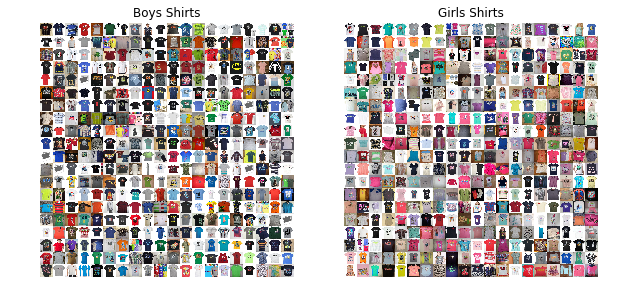

In [22]:
def merge_images(image_batch, size = [20, 20]):
    h,w = image_batch.shape[1], image_batch.shape[2]
    c = image_batch.shape[3]
    img = np.zeros((int(h*size[0]), w*size[1], c))
    for idx, im in enumerate(image_batch):
        i = idx % size[1]
        j = idx // size[1]
        img[j*h:j*h+h, i*w:i*w+w,:] = im/255.0 #notice we divide by 255 to get 0-1 float range
    return img

boys_merged = merge_images(boys_display_images)
girls_merged = merge_images(girls_display_images)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Boys Shirts')
plt.axis('off')
plt.imshow(boys_merged)

plt.subplot(1, 2, 2)
plt.title('Girls Shirts')
plt.axis('off')
plt.imshow(girls_merged)
plt.show()

What would you say is the most obvious difference between boys and girls shirts images?

8. Let's look at the color histograms for the RGB channels for our images:

You'll need to know how to flatten a N-D numpy array: <br>

In [23]:
a = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print('a 3d array:')
print(a)
print("it's shape:")
print(a.shape)
print("the 2d matrix on the first level of the 3d array")
print(a[:, :, 0])
print("the matrix's values flattened as a 1d array")
print(a[:, :, 0].flatten())

a 3d array:
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
it's shape:
(2, 2, 2)
the 2d matrix on the first level of the 3d array
[[1 3]
 [5 7]]
the matrix's values flattened as a 1d array
[1 3 5 7]


Complete the `plot_hist` function to see all color histograms for boys and girls shirts images. See the function usage below for more hints regarding its expected input: <br>

if you prefer you may change the code to use seaborn instead of matplotlib for the histogram construction


In [27]:
boys_display_images[:,:,:,0].shape

(400, 100, 100)

In [50]:
import seaborn as sns

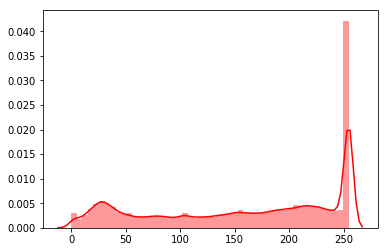

In [55]:
vals = (boys_display_images[:,:,:,0]).flatten()
sns.distplot(vals, color='red', bins=50, hist=True, kde=True, norm_hist=True)
# plt.ylim([0, 0.3])
# plt.yticks([])

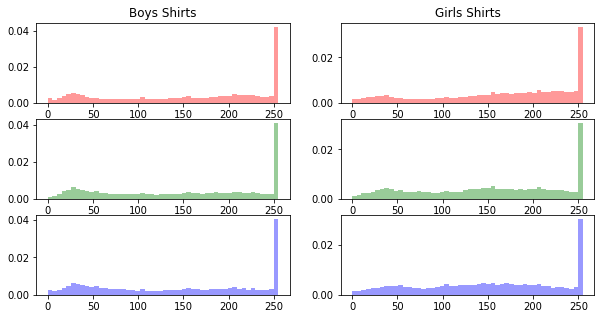

In [57]:
def plot_hist_normed(images, channel, col):
    vals = (images[:,:,:,channel]).flatten()
    sns.distplot(vals, color=col, bins=50, hist=True, kde=False, norm_hist=True)
    
plt.figure(figsize =(10, 5))
plt.subplot(3, 2, 1)
plot_hist_normed(boys_display_images, 0, 'red')
plt.title('Boys Shirts')
plt.subplot(3, 2, 2)
plot_hist_normed(girls_display_images, 0, 'red')
plt.title('Girls Shirts')
plt.subplot(3, 2, 3)
plot_hist_normed(boys_display_images, 1, 'green')
plt.subplot(3, 2, 4)
plot_hist_normed(girls_display_images, 1, 'green')
plt.subplot(3, 2, 5)
plot_hist_normed(boys_display_images, 2, 'blue')
plt.subplot(3, 2, 6)
plot_hist_normed(girls_display_images, 2, 'blue')
plt.show()

What would you say is the most obvious difference between boys and girls shirts images?

9. See the channels mean and median verify your "feelings". Also print out the share of pixels above say 220:

In [58]:
def summary(images, channel, col):
    vals = images[:,:,:,channel]
    chan_mean = np.mean(vals)
    chan_median = np.median(vals)
    chan_share_above_220 = np.sum(vals > 220)
    print('{} mean: {}, median: {}, share above 220: {}'.format(col, str(chan_mean), str(chan_median), str(chan_share_above_220)))
    
print('Boys:')
summary(boys_display_images, 0, 'red')
summary(boys_display_images, 1, 'green')
summary(boys_display_images, 2, 'blue')
print('Girls:')
summary(girls_display_images, 0, 'red')
summary(girls_display_images, 1, 'green')
summary(girls_display_images, 2, 'blue')

Boys:
red mean: 157.0967105, median: 176.0, share above 220: 1306718
green mean: 149.2702205, median: 158.0, share above 220: 1191653
blue mean: 146.19899, median: 153.0, share above 220: 1159777
Girls:
red mean: 166.05558875, median: 183.0, share above 220: 1289530
green mean: 151.3860275, median: 158.0, share above 220: 1007410
blue mean: 151.36942675, median: 156.0, share above 220: 957935


for the summary statistics of the red channel of Girl shirts, please fill in:

#### Q3) mean
#### Q4) median
#### Q5) share above 220

In [59]:
summary(girls_display_images, 0, 'red')

red mean: 166.05558875, median: 183.0, share above 220: 1289530


In [ ]:
ans['Q3'] = 166.05558875
ans['Q4'] = 
ans['Q5'] = ### YOUR answer HERE ###

## finished!
you played with some real world image data you gathered from the web!<br>
exciting!<br>
you know how to gather and "feel" real world data using basic plots and summary satatistics.<br>
now submit your HW so we would know it too.

In [ ]:
import pandas as pd
df_ans = pd.DataFrame.from_dict(ans, orient='index')
if df_ans.shape[0] == 7:
    df_ans.to_csv('{}_{}.csv'.format(ans['HW'],str(ans['id_number'])))
else:
    print("seems like you missed a question, make sure you have run all the code blocks")